In [4]:
import tensorflow as tf

In [3]:
%run C:\Users\sahmahajan\Documents\GitHub\Utilities\synthetic_data_generator.py

In [62]:
tf.random.set_seed(42)
no_obs = 10000
weights = tf.constant([2,-3.4])
beta = 4.2
X = tf.zeros((no_obs,weights.shape[0]))
X += tf.random.normal(shape = X.shape,seed = 42)
y = tf.matmul(X,tf.reshape(weights,(-1,1))) + beta
y += tf.random.normal(y.shape,stddev = 0.01, seed = 42)
y = tf.reshape(y,(-1,1))
for i in range(5):
    print(f"X[0] = {X[i]}, y[0] = {y[i]}")

X[0] = [ 1.3148774  -0.15421568], y[0] = [7.356899]
X[0] = [ 0.9113878 -0.7991441], y[0] = [8.746034]
X[0] = [-0.10875293  0.28436786], y[0] = [3.0244856]
X[0] = [ 0.7661625 -0.6211289], y[0] = [7.8557024]
X[0] = [0.9974318  0.21959257], y[0] = [5.437651]


Checking relationship between X and y

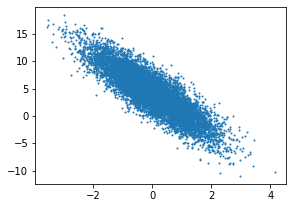

In [67]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize = (4.5,3.25))
fig = plt.scatter(np.array(X[:,1]),np.array(y),1)

In [68]:
#via plotly
import plotly.express as px
fig1 = px.scatter(x=(np.array(X[:,1])),y =np.array(y))
fig1.show()


In [107]:
import random
#Picking minbatches from data
def minibatch_iter(batch_size,X,y):
    """This function provides an iterator for picking up minibatches of desired batch_size. Also needs X (features) and y (label) inputs"""
    no_obs = len(X)
    indices = list(range(no_obs))
    #randomly reading observations
    random.shuffle(indices)
    for i in range(0,no_obs,batch_size):
        j = tf.constant(indices[i:min(i + batch_size, no_obs)])
        yield tf.gather(X,j), tf.gather(y,j)
    


In [108]:
import random
a = list(range(10))
tf.random.shuffle(a, seed=42)
a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [109]:
tf.random.shuffle(a, seed=42)

&lt;tf.Tensor: shape=(10,), dtype=int32, numpy=array([1, 6, 2, 9, 7, 5, 3, 0, 4, 8])&gt;

In [110]:
min_batch = 32
for j,k in minibatch_iter(min_batch,X,y):
    print (j, '\n', k)
    break

tf.Tensor(
[[ 2.2183418e-01 -6.9278091e-01]
 [-8.0293846e-01 -1.8634886e-01]
 [-2.1370409e+00 -1.2594193e-02]
 [-3.6663315e-01  2.5540650e-01]
 [-1.2651100e+00  8.4531301e-01]
 [ 1.8852634e+00 -2.0039496e-01]
 [ 7.8205645e-02 -1.5689660e+00]
 [ 6.2921417e-01 -3.5489702e+00]
 [ 1.2112435e+00 -6.4189069e-02]
 [ 7.6143587e-01 -1.3750222e-03]
 [ 1.0086995e+00 -7.6768076e-01]
 [ 4.2071196e-01 -1.7182928e-02]
 [-3.1361485e-01  5.4532999e-01]
 [-1.1345304e+00 -1.2041044e+00]
 [ 9.7923744e-01  5.4214841e-01]
 [ 3.6888057e-01 -5.9801018e-01]
 [ 2.5493485e-01 -5.1152841e-03]
 [ 1.4226791e+00 -4.3707037e-01]
 [ 2.2542991e-01  4.8161072e-01]
 [-5.1818356e-02  1.1136035e+00]
 [-2.0897549e-01 -2.4794044e-01]
 [-8.3923107e-01  6.7834914e-01]
 [ 6.0716021e-01 -1.5786885e+00]
 [-1.5419850e-01 -1.7945105e-01]
 [ 9.9252617e-01 -1.8754430e-01]
 [-3.3919761e-01 -2.3543408e+00]
 [-8.3953547e-01  2.9752535e-01]
 [-4.3794740e-02 -1.7238470e+00]
 [ 5.1373070e-01  1.9275584e+00]
 [ 6.0655677e-01 -9.6278876e-01]

In [113]:
#setting random initial parameters vector for X(x1 and x2) and 0 for beta, b
w = tf.Variable(tf.random.normal(shape = (2,1),mean= 0, stddev = 0.1, seed=42), trainable = True)
b = tf.Variable(tf.zeros(1),trainable = True)